In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [42]:
PPD = pd.read_csv("player_pos_data.csv")
PPD.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
PPD.set_index("Id", inplace = True)
PPD.head()

,player_id,position,position2
Id,,,
1,1,1.0,NaN
2,2,2.0,1.0
3,3,1.0,NaN
4,4,2.0,1.0
5,5,5.0,NaN


In [43]:
PRD = pd.read_csv("player_reb_data.csv")
PRD.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
PRD.set_index("Id", inplace = True)
PRD.head()

,player_id,games,minutes,off_rebs,def_rebs,off_rebchances,def_rebchances
Id,,,,,,,
1,39,50,856.516667,33,222,744,759
2,166,54,1680.123333,39,210,1638,1461
3,317,70,1962.798333,148,474,1706,1805
4,251,214,3987.693333,95,441,3715,3584
5,10,187,4956.941667,85,978,4581,4379


In [44]:
loc_test = pd.read_csv("testing_data_loc.csv")
loc_test.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
loc_test.set_index("Id", inplace = True)
loc_test.head()

,game_id,playbyplayorder_id,row_type,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,...,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
Id,,,,,,,,,,,,,,,,,,,,,
1,4,595,shot,-19.027053,19.871164,-19.561299,18.261468,-28.772848,-20.131305,-25.062257,...,-37.198845,-17.366327,-40.893383,5.999704,-40.185606,3.857986,-41.937047,0.940924,-41.128611,-0.126855
2,4,596,shot,-31.241325,-16.557071,-28.321632,-15.065638,-16.253902,-0.423465,-12.688562,...,-38.935461,-3.489779,-35.476110,-7.463574,-36.617299,-5.663391,-25.744579,2.007568,-26.997568,0.148252
3,4,597,shot,-19.010274,-13.595167,-12.321997,-9.573885,-33.948531,12.760393,-26.410282,...,-30.802708,6.006223,-25.341379,-1.232503,-28.746937,-1.924971,-37.276387,4.779776,-41.756499,5.591011
4,4,598,shot,-33.708835,-13.357808,-29.629455,-16.061489,-40.948591,22.274634,-35.058592,...,-34.623914,-1.302901,-35.477993,-6.979465,-36.038071,-9.675009,-27.585973,11.054745,-29.002834,9.131641
5,4,599,shot,-14.256493,5.269441,-13.189371,2.904353,-46.556349,4.344373,-42.790092,...,-44.305512,-1.282830,-37.705134,-9.482981,-39.735703,-5.733037,-39.595369,5.797657,-34.375548,6.279269


In [45]:
loc_train = pd.read_csv("training_data_loc.csv")
loc_train.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
loc_train.set_index("Id", inplace = True)
loc_train.head()

,game_id,playbyplayorder_id,row_type,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,...,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
Id,,,,,,,,,,,,,,,,,,,,,
1,8,1379,shot,-43.648817,-21.886196,-42.289158,-22.517425,-39.060457,-6.256763,-37.986458,...,-37.699404,-5.352922,-37.297139,0.203133,-36.933941,-0.336016,-42.696037,-9.402359,-41.918629,-8.539802
2,8,1380,shot,-41.179048,-23.891722,-37.122629,-23.177840,-40.540140,22.875044,-38.674739,...,-39.016553,3.298064,-39.567045,-2.037872,-39.988985,-0.909305,-40.790796,14.652964,-40.390343,13.323796
3,8,1381,shot,-44.880723,-23.307184,-44.240890,-21.381771,-43.861148,2.653954,-41.780069,...,-42.475850,3.011978,-41.932962,-7.616737,-41.760967,-4.860211,-28.924595,-7.303918,-30.620121,-8.088317
4,8,1382,shot,-36.324736,23.242563,-30.859169,18.254055,-41.560159,-15.662187,-42.533999,...,-38.344859,-3.909418,-40.504097,13.970456,-37.996230,9.926756,-34.313047,-17.530376,-36.845039,-17.290519
5,8,1383,shot,-27.609036,-6.286383,-19.092240,-7.244735,-19.579963,-15.127800,-11.755558,...,-33.070691,-8.653539,-41.034914,3.981984,-39.006937,4.605167,-36.231217,-2.679454,-40.551412,-5.541517


In [46]:
pbp_train = pd.read_csv("training_data_pbp.csv")
pbp_train.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)
pbp_train.set_index("Id", inplace = True)
pbp_train.head()

,game_id,playbyplayorder_id,row_type,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,...,playerid_off_player_1,playerid_off_player_2,playerid_off_player_3,playerid_off_player_4,playerid_off_player_5,playerid_def_player_1,playerid_def_player_2,playerid_def_player_3,playerid_def_player_4,playerid_def_player_5
Id,,,,,,,,,,,,,,,,,,,,,
356578,8,1379,shot,NRO,0,0,1,13,1,13,...,661,671,3,260,818,708,447,665,509,362
323090,8,1380,shot,NRO,0,0,13,1,1,13,...,708,447,665,509,362,661,671,3,260,818
355793,8,1381,shot,Yes,1,0,1,13,1,13,...,661,671,3,260,818,708,447,665,509,362
354632,8,1382,shot,No,0,1,1,13,1,13,...,661,671,3,260,818,708,447,665,509,362
323212,8,1383,shot,No,0,1,13,1,1,13,...,708,447,665,509,362,661,671,3,260,818


In [47]:
Merge = pd.merge(pbp_train, loc_train, on='playbyplayorder_id')
Merge.shape

(372181, 77)

In [48]:
from IPython.display import display
pd.options.display.max_columns = None
display(Merge)

,game_id_x,playbyplayorder_id,row_type_x,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,fg2missed,fg2attempted,fg3made,fg3missed,fg3attempted,secondchance,andone,inbonus,eventdescription,actiondescription,shooter_player_id,reb_player_id,playerid_off_player_1,playerid_off_player_2,playerid_off_player_3,playerid_off_player_4,playerid_off_player_5,playerid_def_player_1,playerid_def_player_2,playerid_def_player_3,playerid_def_player_4,playerid_def_player_5,game_id_y,row_type_y,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,AtRim_loc_y_off_player_2,AtShot_loc_x_off_player_3,AtShot_loc_y_off_player_3,AtRim_loc_x_off_player_3,AtRim_loc_y_off_player_3,AtShot_loc_x_off_player_4,AtShot_loc_y_off_player_4,AtRim_loc_x_off_player_4,AtRim_loc_y_off_player_4,AtShot_loc_x_off_player_5,AtShot_loc_y_off_player_5,AtRim_loc_x_off_player_5,AtRim_loc_y_off_player_5,AtShot_loc_x_def_player_1,AtShot_loc_y_def_player_1,AtRim_loc_x_def_player_1,AtRim_loc_y_def_player_1,AtShot_loc_x_def_player_2,AtShot_loc_y_def_player_2,AtRim_loc_x_def_player_2,AtRim_loc_y_def_player_2,AtShot_loc_x_def_player_3,AtShot_loc_y_def_player_3,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
0,8,1379,shot,NRO,0,0,1,13,1,13,0,0,1,0,1,0,0,0,0,0,0,Made Shot,Alley Oop Dunk Shot,260,-1.0,661,671,3,260,818,708,447,665,509,362,8,shot,-43.648817,-21.886196,-42.289158,-22.517425,-39.060457,-6.256763,-37.986458,-5.012755,-23.493163,-14.896039,-22.834331,-14.937105,-42.911336,3.473677,-41.387093,2.050828,-29.922922,-20.534299,-29.419936,-20.474042,-28.252522,-9.956282,-27.505773,-9.493411,-38.453253,1.002708,-39.016729,0.902496,-36.584503,-5.131944,-37.699404,-5.352922,-37.297139,0.203133,-36.933941,-0.336016,-42.696037,-9.402359,-41.918629,-8.539802
1,8,1380,shot,NRO,0,0,13,1,1,13,0,0,1,0,1,0,0,0,0,0,0,Made Shot,Pullup Jump shot,509,-1.0,708,447,665,509,362,661,671,3,260,818,8,shot,-41.179048,-23.891722,-37.122629,-23.177840,-40.540140,22.875044,-38.674739,22.950355,-37.842062,-3.251909,-38.104559,-1.419403,-36.377056,6.410832,-35.689158,3.985698,-23.612382,-2.519468,-15.038482,-3.893163,-29.861693,1.438005,-26.958606,-1.154761,-39.367240,-6.758688,-37.581219,-10.576911,-39.434442,6.754536,-39.016553,3.298064,-39.567045,-2.037872,-39.988985,-0.909305,-40.790796,14.652964,-40.390343,13.323796
2,8,1381,shot,Yes,1,0,1,13,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Layup Shot,671,NaN,661,671,3,260,818,708,447,665,509,362,8,shot,-44.880723,-23.307184,-44.240890,-21.381771,-43.861148,2.653954,-41.780069,1.215472,-32.409728,24.106612,-32.927992,22.656933,-16.734493,13.318846,-14.364874,11.237947,-21.191924,-12.756171,-19.991742,-12.762639,-34.585501,16.145489,-34.416413,16.877854,-26.718384,6.189453,-28.404883,5.040932,-42.567117,4.996908,-42.475850,3.011978,-41.932962,-7.616737,-41.760967,-4.860211,-28.924595,-7.303918,-30.620121,-8.088317
3,8,1382,shot,No,0,1,1,13,1,13,0,0,0,1,1,0,0,0,1,0,0,Missed Shot,Jump Shot,671,665.0,661,671,3,260,818,708,447,665,509,362,8,shot,-36.324736,23.242563,-30.859169,18.254055,-41.560159,-15.662187,-42.533999,-16.142221,-49.117286,-6.748096,-46.129419,-4.639999,-35.471291,9.455880,-34.185306,8.480447,-28.775961,-12.966705,-23.886446,-13.853427,-42.395687,-9.033569,-41.122610,-11.771800,-39.877208,2.474459,-39.879545,5.521357,-35.508664,-7.310620,-38.344859,-3.909418,-40.504097,13.970456,-37.996230,9.926756,-34.313047,-17.530376,-36.845039,-17.290519
4,8,1383,shot,No,0,1,13,1,1,13,0,0,0,0,0,0,1,1,0,0,0,Missed Shot,Jump Shot,509,260.0,708,447,665,509,362,661,671,3,260,818,8,shot,-27.609036,-6.286383,-19.092240,-7.244735,-19.579963,-15.127800,-11.755558,-11.769596,-36.987174,8.4

In [73]:
OR = Merge[Merge['f.oreb']=='Yes']
OR.head()

,game_id_x,playbyplayorder_id,row_type_x,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,fg2missed,fg2attempted,fg3made,fg3missed,fg3attempted,secondchance,andone,inbonus,eventdescription,actiondescription,shooter_player_id,reb_player_id,playerid_off_player_1,playerid_off_player_2,playerid_off_player_3,playerid_off_player_4,playerid_off_player_5,playerid_def_player_1,playerid_def_player_2,playerid_def_player_3,playerid_def_player_4,playerid_def_player_5,game_id_y,row_type_y,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,AtRim_loc_y_off_player_2,AtShot_loc_x_off_player_3,AtShot_loc_y_off_player_3,AtRim_loc_x_off_player_3,AtRim_loc_y_off_player_3,AtShot_loc_x_off_player_4,AtShot_loc_y_off_player_4,AtRim_loc_x_off_player_4,AtRim_loc_y_off_player_4,AtShot_loc_x_off_player_5,AtShot_loc_y_off_player_5,AtRim_loc_x_off_player_5,AtRim_loc_y_off_player_5,AtShot_loc_x_def_player_1,AtShot_loc_y_def_player_1,AtRim_loc_x_def_player_1,AtRim_loc_y_def_player_1,AtShot_loc_x_def_player_2,AtShot_loc_y_def_player_2,AtRim_loc_x_def_player_2,AtRim_loc_y_def_player_2,AtShot_loc_x_def_player_3,AtShot_loc_y_def_player_3,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
2,8,1381,shot,Yes,1,0,1,13,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Layup Shot,671,NaN,661,671,3,260,818,708,447,665,509,362,8,shot,-44.880723,-23.307184,-44.240890,-21.381771,-43.861148,2.653954,-41.780069,1.215472,-32.409728,24.106612,-32.927992,22.656933,-16.734493,13.318846,-14.364874,11.237947,-21.191924,-12.756171,-19.991742,-12.762639,-34.585501,16.145489,-34.416413,16.877854,-26.718384,6.189453,-28.404883,5.040932,-42.567117,4.996908,-42.475850,3.011978,-41.932962,-7.616737,-41.760967,-4.860211,-28.924595,-7.303918,-30.620121,-8.088317
12,8,1391,shot,Yes,1,0,13,1,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Layup Shot,665,665.0,708,447,665,509,362,661,671,3,260,818,8,shot,-19.775584,-13.355072,-18.585145,-14.570038,-17.100709,8.494397,-18.291334,9.125125,-38.185353,7.717307,-37.525732,7.242812,-26.218275,-0.455004,-25.713315,-1.761888,-40.448913,22.777927,-40.313504,22.562152,-37.978575,18.255970,-37.625296,19.240374,-31.406406,2.346346,-31.085549,1.377618,-40.244022,-5.235166,-40.846077,-4.347487,-38.164325,5.232570,-37.360185,5.096417,-35.228801,0.442467,-36.486024,-1.376654
22,8,1401,shot,Yes,1,0,13,1,1,13,0,0,0,0,0,0,1,1,0,0,0,Missed Shot,Step Back Jump shot,509,665.0,708,447,665,509,362,661,671,3,260,818,8,shot,-37.648921,-21.849172,-31.176853,-19.540170,-21.497206,-18.304256,-13.852443,-16.252542,-45.112112,-5.730435,-43.212965,-4.630748,-15.913671,-0.544068,-12.460762,-4.103175,-32.767414,17.974843,-25.691367,16.789295,-19.307677,4.405235,-6.852630,-4.683150,-35.539365,11.975218,-37.117827,8.150331,-40.938225,-5.963933,-37.062935,-2.740925,-38.649255,-0.496139,-41.800331,-1.639485,-29.813548,-8.055822,-31.178455,-6.769993
24,8,1403,shot,Yes,1,0,1,13,1,13,0,0,0,0,0,0,1,1,0,0,0,Missed Shot,Jump Shot,818,818.0,661,671,3,260,818,708,447,665,509,362,8,shot,-38.096495,21.472976,-38.136977,7.368341,-39.647444,-23.002826,-33.118218,-21.870494,-41.044297,-12.517217,-41.755698,-9.896502,-20.587285,17.592326,-19.420878,16.172135,-18.225923,-7.223968,-18.936998,-8.415984,-38.305440,11.743352,-38.825423,6.401560,-29.449564,9.300649,-33.575902,6.939651,-30.176517,-2.836292,-33.420305,-1.660547,-38.309036,-7.493429,-39.856204,-5.774744,-36.478192,-14.956272,-36.592382,-8.601552
33,8,1412,shot,Yes,1,0,13,1,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Floating Jump shot,362,NaN,676,447,744,509,362,490,671,207,3,819,8,shot,-41.905035,22.556998,-39.580422,22.263074,-21.641811,14.788223,-19.921964,14.326935,-32.607220

In [72]:
OR.columns

Index(['game_id_x', 'playbyplayorder_id', 'row_type_x', 'f.oreb',
       'reboffensive', 'rebdefensive', 'off_team_id', 'def_team_id',
       'home_team_id', 'away_team_id', 'ftmade', 'ftmissed', 'fg2made',
       'fg2missed', 'fg2attempted', 'fg3made', 'fg3missed', 'fg3attempted',
       'secondchance', 'andone', 'inbonus', 'eventdescription',
       'actiondescription', 'shooter_player_id', 'reb_player_id',
       'playerid_off_player_1', 'playerid_off_player_2',
       'playerid_off_player_3', 'playerid_off_player_4',
       'playerid_off_player_5', 'playerid_def_player_1',
       'playerid_def_player_2', 'playerid_def_player_3',
       'playerid_def_player_4', 'playerid_def_player_5', 'game_id_y',
       'row_type_y', 'AtShot_loc_x_off_player_1', 'AtShot_loc_y_off_player_1',
       'AtRim_loc_x_off_player_1', 'AtRim_loc_y_off_player_1',
       'AtShot_loc_x_off_player_2', 'AtShot_loc_y_off_player_2',
       'AtRim_loc_x_off_player_2', 'AtRim_loc_y_off_player_2',
       'AtShot_loc_

In [170]:
OR.shape

(48158, 77)

In [171]:
OR.isnull().sum()

game_id_x                       0
playbyplayorder_id              0
row_type_x                      0
f.oreb                          0
reboffensive                    0
                             ... 
AtRim_loc_y_def_player_4     1261
AtShot_loc_x_def_player_5     973
AtShot_loc_y_def_player_5     973
AtRim_loc_x_def_player_5     1264
AtRim_loc_y_def_player_5     1264
Length: 77, dtype: int64

In [172]:
OR.dropna(inplace = True)
OR.shape

<ipython-input-172-e209fb487915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OR.dropna(inplace = True)


(37431, 77)

In [173]:
PID = OR [['playerid_off_player_1', 'playerid_off_player_2',
                                                   'playerid_off_player_3', 'playerid_off_player_4',
                                                   'playerid_off_player_5']]

In [174]:
PID.columns.values

array(['playerid_off_player_1', 'playerid_off_player_2',
       'playerid_off_player_3', 'playerid_off_player_4',
       'playerid_off_player_5'], dtype=object)

In [175]:
np_pid = PID.to_numpy()
np_pid

array([[708, 447, 665, 509, 362],
       [708, 447, 665, 509, 362],
       [661, 671,   3, 260, 818],
       ...,
       [177, 255, 120, 573, 258],
       [177, 255, 120, 573, 258],
       [177, 255, 120, 573, 258]], dtype=int64)

In [176]:
off_player_x_pos = OR [['AtShot_loc_x_off_player_1', 'AtShot_loc_x_off_player_2',
                      'AtShot_loc_x_off_player_3', 'AtShot_loc_x_off_player_4',
                    'AtShot_loc_x_off_player_5']]

In [177]:
off_player_y_pos = OR [['AtShot_loc_y_off_player_1', 'AtShot_loc_y_off_player_2',
                      'AtShot_loc_y_off_player_3', 'AtShot_loc_y_off_player_4',
                    'AtShot_loc_y_off_player_5']]

In [178]:
np_xpos = off_player_x_pos.to_numpy()
np_xpos

array([[-19.77558362, -17.1007086 , -38.18535346, -26.2182753 ,
        -40.44891271],
       [-37.64892108, -21.49720584, -45.11211168, -15.91367069,
        -32.76741406],
       [-38.09649506, -39.64744418, -41.04429668, -20.58728549,
        -18.22592262],
       ...,
       [-40.9859853 , -15.99388361, -37.23653052, -43.12378364,
        -18.13285979],
       [-43.74260153, -17.24180859, -38.46624332, -48.31604351,
        -22.07871025],
       [-23.28936538, -42.33249316, -29.13982826, -44.4651603 ,
        -37.3401515 ]])

In [179]:
np_ypos = off_player_y_pos.to_numpy()
np_ypos

array([[-13.35507207,   8.49439659,   7.717307  ,  -0.45500439,
         22.77792674],
       [-21.84917231, -18.30425606,  -5.73043504,  -0.5440677 ,
         17.97484328],
       [ 21.47297615, -23.00282571, -12.51721729,  17.59232647,
         -7.22396805],
       ...,
       [-22.00675395,  -8.06837856,  -3.76211073,  24.09284501,
         14.8135123 ],
       [-22.11339646, -11.54509905,   0.33907505,  -5.61917346,
         17.0287637 ],
       [  3.69228355, -21.85866882,  10.47326412,   4.10871581,
         23.52313347]])

In [180]:
shooter_id_li = OR['shooter_player_id'].values
shooter_id_li

array([665, 509, 818, ..., 573, 177, 258], dtype=int64)

In [181]:
shooter_x_pos = []
shooter_y_pos = []

for i in range(0,len(shooter_id_li)):
    for j in range(0,len(PID.columns.values)):
        if(shooter_id_li[i]== np_pid[i][j]):
            shooter_x_pos.append(np_xpos[i][j])
            shooter_y_pos.append(np_ypos[i][j])
            
            

In [182]:
shooter_x_pos

[-38.1853534603864,
 -15.9136706851423,
 -18.2259226204455,
 -41.898861548397704,
 -28.206583203375303,
 -43.5440225203335,
 -14.7309429618716,
 -31.8022948075458,
 -42.6088354079239,
 -42.2549860741198,
 -41.5879958402738,
 -15.444870053473899,
 -27.372191146891602,
 -21.172616750001897,
 -36.542801807653206,
 -32.405199095178396,
 -26.5683612896875,
 -35.121198748555,
 -35.6763399323076,
 -39.8436241467111,
 -37.992651083171395,
 -28.8286177958362,
 -41.1798860467412,
 -39.9300678574108,
 -41.714455537162706,
 -42.0462915791571,
 -34.8054765493423,
 -43.717587649933996,
 -35.2942202609777,
 -40.9418848663941,
 -38.532757171094396,
 -40.7863512149453,
 -33.693251595851,
 -16.9952459505573,
 -28.6567349059694,
 -27.993695749286605,
 -33.3170172590576,
 -39.983178756889,
 -42.1497500279546,
 -23.449238267578203,
 -39.5160696419701,
 -41.7086987677216,
 -36.3462000835128,
 -40.3234710703045,
 -22.876340724509202,
 -20.707971550189,
 -41.561138145811896,
 -29.163115483522397,
 -34.6540685

In [183]:
shooter_y_pos

[7.71730700215325,
 -0.5440677040070301,
 -7.22396804951131,
 2.87647777587175,
 8.09188787870109,
 23.0760810762644,
 2.26018010253087,
 -0.8269952681846919,
 -23.6169709863514,
 0.744915485754609,
 -0.7526849387586121,
 -16.2828430291265,
 19.6841323680244,
 13.8596345981397,
 2.7421904550865297,
 -21.098557870369397,
 -19.5759472200461,
 2.6632278186269103,
 3.25880980581045,
 2.1299213682115097,
 -1.54353724738583,
 20.486912706978604,
 -3.0239541625603996,
 -2.24209781369194,
 -1.75455570619553,
 -4.66780133783817,
 -2.9172489209100596,
 -9.68476929537952,
 -2.7490983640961404,
 8.79741675056517,
 -3.39613381940871,
 -3.7185004013962994,
 13.906612367816301,
 -7.94572170889005,
 20.1263543985784,
 6.3496799805946695,
 12.4280316322856,
 4.6966178218647805,
 -4.81948134316132,
 17.2049214806035,
 0.583224915042519,
 -23.099379859324497,
 14.339738514758599,
 -3.51772092930973,
 -17.665073897764103,
 13.521142333131301,
 -23.1472458465025,
 -23.149788046851803,
 -1.18828686127439,
 

In [184]:
Shooter_pos = DataFrame(shooter_x_pos , columns=['shooter_x_pos'])
Shooter_pos

,shooter_x_pos
0,-38.185353
1,-15.913671
2,-18.225923
3,-41.898862
4,-28.206583
...,...
37426,-39.779565
37427,-29.735507
37428,-43.123784
37429,-43.742602


In [185]:
Shooter_pos ['shooter_y_pos'] = shooter_y_pos
Shooter_pos

,shooter_x_pos,shooter_y_pos
0,-38.185353,7.717307
1,-15.913671,-0.544068
2,-18.225923,-7.223968
3,-41.898862,2.876478
4,-28.206583,8.091888
...,...,...
37426,-39.779565,5.998322
37427,-29.735507,-22.252293
37428,-43.123784,24.092845
37429,-43.742602,-22.113396


In [186]:
Shooter_pos = Shooter_pos[Shooter_pos['shooter_x_pos']<0]
Shooter_pos

,shooter_x_pos,shooter_y_pos
0,-38.185353,7.717307
1,-15.913671,-0.544068
2,-18.225923,-7.223968
3,-41.898862,2.876478
4,-28.206583,8.091888
...,...,...
37426,-39.779565,5.998322
37427,-29.735507,-22.252293
37428,-43.123784,24.092845
37429,-43.742602,-22.113396


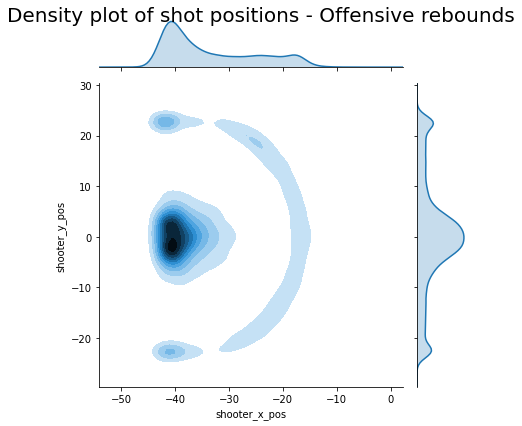

In [187]:
p=sns.jointplot(Shooter_pos['shooter_x_pos'], Shooter_pos['shooter_y_pos'], kind='kde')
p.fig.suptitle('Density plot of shot positions - Offensive rebounds',size=20)
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

In [111]:
DR = Merge[Merge['f.oreb']=='No']
DR.head()

,game_id_x,playbyplayorder_id,row_type_x,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,fg2missed,fg2attempted,fg3made,fg3missed,fg3attempted,secondchance,andone,inbonus,eventdescription,actiondescription,shooter_player_id,reb_player_id,playerid_off_player_1,playerid_off_player_2,playerid_off_player_3,playerid_off_player_4,playerid_off_player_5,playerid_def_player_1,playerid_def_player_2,playerid_def_player_3,playerid_def_player_4,playerid_def_player_5,game_id_y,row_type_y,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,AtRim_loc_y_off_player_2,AtShot_loc_x_off_player_3,AtShot_loc_y_off_player_3,AtRim_loc_x_off_player_3,AtRim_loc_y_off_player_3,AtShot_loc_x_off_player_4,AtShot_loc_y_off_player_4,AtRim_loc_x_off_player_4,AtRim_loc_y_off_player_4,AtShot_loc_x_off_player_5,AtShot_loc_y_off_player_5,AtRim_loc_x_off_player_5,AtRim_loc_y_off_player_5,AtShot_loc_x_def_player_1,AtShot_loc_y_def_player_1,AtRim_loc_x_def_player_1,AtRim_loc_y_def_player_1,AtShot_loc_x_def_player_2,AtShot_loc_y_def_player_2,AtRim_loc_x_def_player_2,AtRim_loc_y_def_player_2,AtShot_loc_x_def_player_3,AtShot_loc_y_def_player_3,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
3,8,1382,shot,No,0,1,1,13,1,13,0,0,0,1,1,0,0,0,1,0,0,Missed Shot,Jump Shot,671,665.0,661,671,3,260,818,708,447,665,509,362,8,shot,-36.324736,23.242563,-30.859169,18.254055,-41.560159,-15.662187,-42.533999,-16.142221,-49.117286,-6.748096,-46.129419,-4.639999,-35.471291,9.455880,-34.185306,8.480447,-28.775961,-12.966705,-23.886446,-13.853427,-42.395687,-9.033569,-41.122610,-11.771800,-39.877208,2.474459,-39.879545,5.521357,-35.508664,-7.310620,-38.344859,-3.909418,-40.504097,13.970456,-37.996230,9.926756,-34.313047,-17.530376,-36.845039,-17.290519
4,8,1383,shot,No,0,1,13,1,1,13,0,0,0,0,0,0,1,1,0,0,0,Missed Shot,Jump Shot,509,260.0,708,447,665,509,362,661,671,3,260,818,8,shot,-27.609036,-6.286383,-19.092240,-7.244735,-19.579963,-15.127800,-11.755558,-11.769596,-36.987174,8.414099,-35.699724,5.216617,-41.843055,-22.783231,-44.681689,-23.157430,-8.281322,3.069789,-3.759128,6.904515,-39.585786,-19.223505,-37.362024,-27.317024,-17.979623,-2.091171,-17.180221,-0.576425,-28.737417,-11.971262,-33.070691,-8.653539,-41.034914,3.981984,-39.006937,4.605167,-36.231217,-2.679454,-40.551412,-5.541517
5,8,1384,final ft,No,0,1,1,13,1,13,0,1,0,0,0,0,0,0,0,0,0,Free Throw,Free Throw 2 of 2,3,447.0,661,671,3,260,818,708,447,665,509,362,8,final ft,-38.144502,23.055812,NaN,NaN,-24.735472,19.423015,NaN,NaN,-35.501736,2.191550,NaN,NaN,-36.114114,-11.533469,NaN,NaN,-17.131694,5.876805,NaN,NaN,-36.534968,0.905893,NaN,NaN,-36.595556,-7.906900,NaN,NaN,-25.857288,4.069047,NaN,NaN,-40.398905,9.017462,NaN,NaN,-31.125006,9.398328,NaN,NaN
7,8,1386,shot,No,0,1,13,1,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Layup Shot,447,818.0,708,447,665,509,362,661,671,3,260,818,8,shot,-20.538644,18.063750,-17.650699,19.182317,-39.899257,3.462920,-43.942546,-0.696620,-23.122508,-4.534819,-23.955661,-4.117934,-36.578666,-21.881293,-35.737845,-23.156574,-19.684760,4.791400,-16.993770,4.380739,-24.509479,5.789433,-22.428789,3.816749,-26.035708,13.528456,-25.829642,14.666955,-36.981556,-12.588408,-37.816140,-12.957774,-37.644160,2.368364,-43.165741,3.596784,-33.192849,2.130442,-36.258806,-0.217358
13,8,1392,shot,No,0,1,13,1,1,13,0,0,0,0,0,0,1,1,1,0,0,Missed Shot,Jump Shot,708,260.0,708,447,665,509,362,661,671,3,260,818,8,shot,-22.552349,-15.673885,-19.861175,-15.836894,-17.907960,10.888910,-14.917382,12.774362,-35.726879,6.984729,-37.197371,0.074010,-21.544391,-2.163163,-14.922788,-1.723846,-40.533190,23.635575,-38.240591,20.554505,-38.116241,16.032094,-40.

In [148]:
DR['eventdescription'].value_counts()

Missed Shot    119150
Free Throw         52
Name: eventdescription, dtype: int64

In [112]:
DR.dropna(inplace = True)
DR.shape

<ipython-input-112-bb93eb1a016f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DR.dropna(inplace = True)


(119202, 77)

In [113]:
DR.head()

,game_id_x,playbyplayorder_id,row_type_x,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,fg2missed,fg2attempted,fg3made,fg3missed,fg3attempted,secondchance,andone,inbonus,eventdescription,actiondescription,shooter_player_id,reb_player_id,playerid_off_player_1,playerid_off_player_2,playerid_off_player_3,playerid_off_player_4,playerid_off_player_5,playerid_def_player_1,playerid_def_player_2,playerid_def_player_3,playerid_def_player_4,playerid_def_player_5,game_id_y,row_type_y,AtShot_loc_x_off_player_1,AtShot_loc_y_off_player_1,AtRim_loc_x_off_player_1,AtRim_loc_y_off_player_1,AtShot_loc_x_off_player_2,AtShot_loc_y_off_player_2,AtRim_loc_x_off_player_2,AtRim_loc_y_off_player_2,AtShot_loc_x_off_player_3,AtShot_loc_y_off_player_3,AtRim_loc_x_off_player_3,AtRim_loc_y_off_player_3,AtShot_loc_x_off_player_4,AtShot_loc_y_off_player_4,AtRim_loc_x_off_player_4,AtRim_loc_y_off_player_4,AtShot_loc_x_off_player_5,AtShot_loc_y_off_player_5,AtRim_loc_x_off_player_5,AtRim_loc_y_off_player_5,AtShot_loc_x_def_player_1,AtShot_loc_y_def_player_1,AtRim_loc_x_def_player_1,AtRim_loc_y_def_player_1,AtShot_loc_x_def_player_2,AtShot_loc_y_def_player_2,AtRim_loc_x_def_player_2,AtRim_loc_y_def_player_2,AtShot_loc_x_def_player_3,AtShot_loc_y_def_player_3,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
3,8,1382,shot,No,0,1,1,13,1,13,0,0,0,1,1,0,0,0,1,0,0,Missed Shot,Jump Shot,671,665.0,661,671,3,260,818,708,447,665,509,362,8,shot,-36.324736,23.242563,-30.859169,18.254055,-41.560159,-15.662187,-42.533999,-16.142221,-49.117286,-6.748096,-46.129419,-4.639999,-35.471291,9.455880,-34.185306,8.480447,-28.775961,-12.966705,-23.886446,-13.853427,-42.395687,-9.033569,-41.122610,-11.771800,-39.877208,2.474459,-39.879545,5.521357,-35.508664,-7.310620,-38.344859,-3.909418,-40.504097,13.970456,-37.996230,9.926756,-34.313047,-17.530376,-36.845039,-17.290519
4,8,1383,shot,No,0,1,13,1,1,13,0,0,0,0,0,0,1,1,0,0,0,Missed Shot,Jump Shot,509,260.0,708,447,665,509,362,661,671,3,260,818,8,shot,-27.609036,-6.286383,-19.092240,-7.244735,-19.579963,-15.127800,-11.755558,-11.769596,-36.987174,8.414099,-35.699724,5.216617,-41.843055,-22.783231,-44.681689,-23.157430,-8.281322,3.069789,-3.759128,6.904515,-39.585786,-19.223505,-37.362024,-27.317024,-17.979623,-2.091171,-17.180221,-0.576425,-28.737417,-11.971262,-33.070691,-8.653539,-41.034914,3.981984,-39.006937,4.605167,-36.231217,-2.679454,-40.551412,-5.541517
7,8,1386,shot,No,0,1,13,1,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Layup Shot,447,818.0,708,447,665,509,362,661,671,3,260,818,8,shot,-20.538644,18.063750,-17.650699,19.182317,-39.899257,3.462920,-43.942546,-0.696620,-23.122508,-4.534819,-23.955661,-4.117934,-36.578666,-21.881293,-35.737845,-23.156574,-19.684760,4.791400,-16.993770,4.380739,-24.509479,5.789433,-22.428789,3.816749,-26.035708,13.528456,-25.829642,14.666955,-36.981556,-12.588408,-37.816140,-12.957774,-37.644160,2.368364,-43.165741,3.596784,-33.192849,2.130442,-36.258806,-0.217358
13,8,1392,shot,No,0,1,13,1,1,13,0,0,0,0,0,0,1,1,1,0,0,Missed Shot,Jump Shot,708,260.0,708,447,665,509,362,661,671,3,260,818,8,shot,-22.552349,-15.673885,-19.861175,-15.836894,-17.907960,10.888910,-14.917382,12.774362,-35.726879,6.984729,-37.197371,0.074010,-21.544391,-2.163163,-14.922788,-1.723846,-40.533190,23.635575,-38.240591,20.554505,-38.116241,16.032094,-40.366127,7.670994,-29.445564,-0.830781,-35.851637,-3.009195,-30.459432,-12.513501,-23.982688,-21.749988,-37.678695,5.747808,-39.767677,1.484085,-28.933663,-6.631924,-31.135076,-4.433301
21,8,1400,shot,No,0,1,1,13,1,13,0,0,0,1,1,0,0,0,0,0,0,Missed Shot,Turnaround Jump Shot,260,362.0,661,671,3,260,818,708,447,665,509,362,8,shot,-27.438146,-20.079441,-26.735284,-19.268931,-43.954821,-19.878604,-39.483182,-21.939493,-36.254274,-8.

In [135]:
np_pid_dr = DR[['playerid_off_player_1','playerid_off_player_2','playerid_off_player_3','playerid_off_player_4','playerid_off_player_5']].to_numpy()
np_pid_dr

array([[661, 671,   3, 260, 818],
       [708, 447, 665, 509, 362],
       [708, 447, 665, 509, 362],
       ...,
       [  4,   8, 162, 196, 728],
       [177, 123, 120, 573, 258],
       [  4,   8, 162, 197, 196]], dtype=int64)

In [137]:
np.shape(np_pid_dr)

(119202, 5)

In [115]:
off_player_x_pos_dr = DR [['AtShot_loc_x_off_player_1', 'AtShot_loc_x_off_player_2',
                      'AtShot_loc_x_off_player_3', 'AtShot_loc_x_off_player_4',
                    'AtShot_loc_x_off_player_5']]

In [116]:
off_player_y_pos_dr = DR [['AtShot_loc_y_off_player_1', 'AtShot_loc_y_off_player_2',
                      'AtShot_loc_y_off_player_3', 'AtShot_loc_y_off_player_4',
                    'AtShot_loc_y_off_player_5']]

In [138]:
off_player_x_pos_dr.shape

(119202, 5)

In [139]:
off_player_y_pos_dr.shape

(119202, 5)

In [117]:
np_xpos_dr = off_player_x_pos_dr.to_numpy()
np_xpos_dr

array([[-36.32473585, -41.56015935, -49.11728627, -35.47129138,
        -28.77596096],
       [-27.60903619, -19.57996262, -36.98717354, -41.84305517,
         -8.28132151],
       [-20.53864443, -39.8992571 , -23.12250813, -36.5786656 ,
        -19.68475994],
       ...,
       [-33.5669029 , -32.9791328 , -40.64966477, -49.53654355,
        -19.65927928],
       [-41.86455356, -30.4967861 , -40.50550784, -22.6784451 ,
        -38.85503507],
       [ -9.057437  , -36.78628155, -41.9262781 , -19.27878401,
        -39.90328718]])

In [151]:
np_ypos_dr = off_player_y_pos_dr.to_numpy()
np_ypos_dr

array([[ 23.24256329, -15.66218714,  -6.7480961 ,   9.45587954,
        -12.96670484],
       [ -6.28638293, -15.12780018,   8.41409886, -22.78323088,
          3.06978918],
       [ 18.06375037,   3.46292036,  -4.53481905, -21.88129335,
          4.79140029],
       ...,
       [ 13.88691464, -22.64279868,   3.1564442 ,   6.78517341,
         15.33776516],
       [ 22.47209449,  15.20170703,  -2.88471399, -18.24338141,
        -22.68287569],
       [  2.59945809,  -1.87607318,   1.4376505 , -19.03031819,
         -2.22807286]])

In [140]:
shooter_id_li_dr = DR['shooter_player_id'].values
shooter_id_li_dr

array([671, 509, 447, ...,   8, 123, 196], dtype=int64)

In [141]:
len(shooter_id_li_dr)

119202

In [152]:
shooter_x_pos_dr = []
shooter_y_pos_dr = []

for i in range(0,len(shooter_id_li_dr)):
    for j in range(0,len(PID.columns.values)):
        if(shooter_id_li_dr[i]== np_pid_dr[i][j]):
            shooter_x_pos_dr.append(np_xpos_dr[i][j])
            shooter_y_pos_dr.append(np_ypos_dr[i][j])

In [150]:
shooter_x_pos_dr

[-41.5601593457721,
 -41.8430551656708,
 -39.8992570992559,
 -22.5523491298407,
 -35.8160996037349,
 -33.448434965480104,
 -44.206094842180605,
 -40.6911869237944,
 -36.517162214089204,
 -41.37351433277129,
 -38.990575918238605,
 -41.1158784350939,
 -38.7569487314858,
 -22.8000860735774,
 -20.9698154953495,
 -38.9576150337979,
 -39.778127230517605,
 -40.7277333235182,
 -30.121336276363603,
 -39.8296662892401,
 -25.156358863487803,
 -40.3486954172328,
 -20.7889898557961,
 -32.3256253655627,
 -13.1145728851669,
 -37.7958842018805,
 -41.7973599160835,
 -41.7028740134463,
 -41.004712468665105,
 -36.8610701020248,
 -19.5599914814532,
 -29.9523152622581,
 -35.410136326644604,
 -40.7588154219836,
 -38.575095146019,
 -22.4677845259756,
 -23.9577809366956,
 -28.092020525820605,
 27.8260775780864,
 -29.8074936607108,
 -35.4315974159353,
 -21.3885887735523,
 -18.4910125645064,
 -40.839036477133604,
 -18.927174850087603,
 -42.0559759485163,
 -38.4507199834473,
 -40.365986225008996,
 -17.0079879062

In [153]:
shooter_y_pos_dr

[-15.662187135797,
 -22.783230880145002,
 3.46292035967112,
 -15.6738845403306,
 8.03826151818037,
 14.4166362764686,
 9.83919715924188,
 -0.22143351458013003,
 -0.49911109931767,
 -1.46661323092878,
 -4.42511533461511,
 4.09603996345773,
 -3.4035183363407797,
 14.375480549261,
 -13.5939599815756,
 5.05348203135654,
 4.72406468868256,
 -19.091745600476898,
 23.2171961054392,
 -3.3242089278809703,
 17.7315505771525,
 -0.375178482513875,
 -12.7770673716441,
 2.08499966956675,
 1.13716951711103,
 0.5101138952188189,
 1.3730504400469399,
 -7.05875638496131,
 22.148972473144497,
 -1.9372511110082298,
 9.91819824511185,
 -2.71255303744227,
 15.391636695750101,
 -23.280978650804602,
 7.9758761661127195,
 5.821447951328009,
 16.5162148459628,
 16.5164795855992,
 -3.90872200150043,
 -4.009968442246319,
 4.63223122777417,
 -14.1584262787737,
 6.43212207110599,
 -21.0093681524508,
 -11.006039948202698,
 1.3984272748976898,
 1.07430534739047,
 3.3352381522767205,
 12.1393346959166,
 -19.4499753043

In [161]:
Shooter_pos_dr = pd.DataFrame()
Shooter_pos_dr ['shooter_x_pos_dr'] = shooter_x_pos_dr
Shooter_pos_dr ['shooter_y_pos_dr'] = shooter_y_pos_dr
#Shooter_pos_dr = Shooter_pos_dr[Shooter_pos_dr['shooter_x_pos_dr']<0]
#Shooter_pos_dr
Shooter_pos_dr.head()

,shooter_x_pos_dr,shooter_y_pos_dr
0,-41.560159,-15.662187
1,-41.843055,-22.783231
2,-39.899257,3.462920
3,-22.552349,-15.673885
4,-35.816100,8.038262


In [162]:
Shooter_pos_dr = Shooter_pos_dr[Shooter_pos_dr['shooter_x_pos_dr']<0]
Shooter_pos_dr.head()

,shooter_x_pos_dr,shooter_y_pos_dr
0,-41.560159,-15.662187
1,-41.843055,-22.783231
2,-39.899257,3.462920
3,-22.552349,-15.673885
4,-35.816100,8.038262


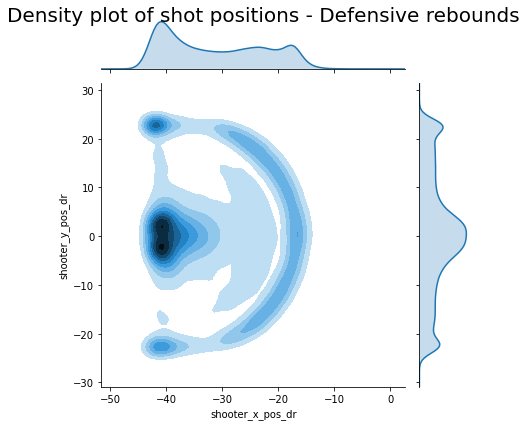

In [263]:
p = sns.jointplot(Shooter_pos_dr['shooter_x_pos_dr'], Shooter_pos_dr['shooter_y_pos_dr'], kind='kde')
p.fig.suptitle('Density plot of shot positions - Defensive rebounds',size=20)
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

In [255]:
# Printing the % of Offensive rebounds taken of missed 3P attempts
print("Offensive rebounds taken of missed 3P attempts:" , "{:.2f}".format(OR['fg3missed'].sum()/DR['fg3missed'].sum()*100),"%")

Offensive rebounds taken of missed 3P attempts: 24.98 %


In [256]:
# Printing the % of Offensive rebounds taken of missed 2P attempts
print("Offensive rebounds taken of missed 2P attempts:" , "{:.2f}".format(OR['fg2attempted'].sum()/DR['fg2attempted'].sum()*100),"%")

Offensive rebounds taken of missed 2P attempts: 35.74 %


In [248]:
OR['Shot-Rim_loc_x_off_player_1'] = OR['AtShot_loc_x_off_player_1'] - OR['AtRim_loc_x_off_player_1']
OR['Shot-Rim_loc_x_off_player_2'] = OR['AtShot_loc_x_off_player_2'] - OR['AtRim_loc_x_off_player_2']
OR['Shot-Rim_loc_x_off_player_3'] = OR['AtShot_loc_x_off_player_3'] - OR['AtRim_loc_x_off_player_3']
OR['Shot-Rim_loc_x_off_player_4'] = OR['AtShot_loc_x_off_player_4'] - OR['AtRim_loc_x_off_player_4']
OR['Shot-Rim_loc_x_off_player_5'] = OR['AtShot_loc_x_off_player_5'] - OR['AtRim_loc_x_off_player_5']


In [213]:
OR[['Shot-Rim_loc_x_off_player_1','Shot-Rim_loc_x_off_player_2','Shot-Rim_loc_x_off_player_3',
    'Shot-Rim_loc_x_off_player_4','Shot-Rim_loc_x_off_player_5']]

,Shot-Rim_loc_x_off_player_1,Shot-Rim_loc_x_off_player_2,Shot-Rim_loc_x_off_player_3,Shot-Rim_loc_x_off_player_4,Shot-Rim_loc_x_off_player_5
12,-1.190438,1.190626,-0.659621,-0.504961,-0.135409
22,-6.472068,-7.644763,-1.899147,-3.452908,-7.076047
24,0.040482,-6.529227,0.711401,-1.166408,0.711076
41,-1.311869,1.355563,3.854711,-1.177288,5.641505
45,6.182035,3.393149,-1.669758,3.881602,0.092830
...,...,...,...,...,...
372142,-1.466946,0.944262,4.832225,-1.777769,-0.473978
372157,-1.552815,-4.050665,-1.842998,-5.319106,-4.057061
372173,-1.645997,-3.086774,3.339831,2.626987,-1.764142
372174,1.065305,0.723372,0.251786,-5.315479,-0.714910


In [247]:
DR['Shot-Rim_loc_x_off_player_1'] = DR['AtShot_loc_x_off_player_1'] - DR['AtRim_loc_x_off_player_1']
DR['Shot-Rim_loc_x_off_player_2'] = DR['AtShot_loc_x_off_player_2'] - DR['AtRim_loc_x_off_player_2']
DR['Shot-Rim_loc_x_off_player_3'] = DR['AtShot_loc_x_off_player_3'] - DR['AtRim_loc_x_off_player_3']
DR['Shot-Rim_loc_x_off_player_4'] = DR['AtShot_loc_x_off_player_4'] - DR['AtRim_loc_x_off_player_4']
DR['Shot-Rim_loc_x_off_player_5'] = DR['AtShot_loc_x_off_player_5'] - DR['AtRim_loc_x_off_player_5']

In [215]:
DR[['Shot-Rim_loc_x_off_player_1','Shot-Rim_loc_x_off_player_2','Shot-Rim_loc_x_off_player_3',
    'Shot-Rim_loc_x_off_player_4','Shot-Rim_loc_x_off_player_5']]

,Shot-Rim_loc_x_off_player_1,Shot-Rim_loc_x_off_player_2,Shot-Rim_loc_x_off_player_3,Shot-Rim_loc_x_off_player_4,Shot-Rim_loc_x_off_player_5
3,-5.465567,0.973839,-2.987867,-1.285985,-4.889515
4,-8.516796,-7.824405,-1.287450,2.838634,-4.522193
7,-2.887945,4.043289,0.833153,-0.840821,-2.690990
13,-2.691174,-2.990578,1.470492,-6.621603,-2.292599
21,-0.702862,-4.471640,0.757904,-3.688362,-0.928397
...,...,...,...,...,...
372151,-3.420520,9.340885,-1.901122,-5.538531,-2.749374
372158,-0.758412,1.074756,-1.068802,-0.375638,0.957680
372160,0.559636,-1.374529,0.526302,-7.337133,-5.784098
372163,-4.907820,-4.772478,1.096256,-4.773400,0.779599


In [235]:
OR['Dist_from_rim_off_player_1'] = ((OR['AtRim_loc_x_off_player_1'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_off_player_1'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_off_player_2'] = ((OR['AtRim_loc_x_off_player_2'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_off_player_2'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_off_player_3'] = ((OR['AtRim_loc_x_off_player_3'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_off_player_3'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_off_player_4'] = ((OR['AtRim_loc_x_off_player_4'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_off_player_4'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_off_player_5'] = ((OR['AtRim_loc_x_off_player_5'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_off_player_5'] - 0).pow(2)).pow(1/2)

In [236]:
OR[['Dist_from_rim_off_player_1','Dist_from_rim_off_player_2','Dist_from_rim_off_player_3','Dist_from_rim_off_player_4','Dist_from_rim_off_player_5']]

,Dist_from_rim_off_player_1,Dist_from_rim_off_player_2,Dist_from_rim_off_player_3,Dist_from_rim_off_player_4,Dist_from_rim_off_player_5
12,27.365973,25.170954,8.384674,16.133181,22.607835
22,22.217329,32.286511,4.856346,29.575251,23.232738
24,8.206484,23.512256,9.896503,27.570413,24.315876
41,24.035150,24.308144,3.538317,1.435347,7.288881
45,3.018974,14.931023,27.680322,24.594751,4.497353
...,...,...,...,...,...
372142,23.193602,2.149053,6.752092,27.923325,24.276142
372157,8.514146,26.374314,4.529408,33.580410,25.489901
372173,19.436262,28.968111,4.698396,24.816208,29.976045
372174,21.953754,28.834219,3.638088,7.529583,27.029170


In [239]:
OR['Dist_from_rim_def_player_1'] = ((OR['AtRim_loc_x_def_player_1'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_def_player_1'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_def_player_2'] = ((OR['AtRim_loc_x_def_player_2'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_def_player_2'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_def_player_3'] = ((OR['AtRim_loc_x_def_player_3'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_def_player_3'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_def_player_4'] = ((OR['AtRim_loc_x_def_player_4'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_def_player_4'] - 0).pow(2)).pow(1/2)
OR['Dist_from_rim_def_player_5'] = ((OR['AtRim_loc_x_def_player_5'] - (-41.75)).pow(2) + (OR['AtRim_loc_y_def_player_5'] - 0).pow(2)).pow(1/2)

In [240]:
OR[['Dist_from_rim_def_player_1','Dist_from_rim_def_player_2','Dist_from_rim_def_player_3','Dist_from_rim_def_player_4','Dist_from_rim_def_player_5']]

,Dist_from_rim_def_player_1,Dist_from_rim_def_player_2,Dist_from_rim_def_player_3,Dist_from_rim_def_player_4,Dist_from_rim_def_player_5
12,19.677530,10.753062,4.440464,6.726361,5.441013
22,35.210203,9.374696,5.429663,1.640257,12.553500
24,7.037977,10.722622,8.493600,6.077346,10.029343
41,2.597731,17.869819,3.875356,9.053373,2.728341
45,3.794044,6.221699,4.877038,22.003575,60.446658
...,...,...,...,...,...
372142,6.006016,3.859838,10.358788,0.896606,13.714640
372157,7.854740,9.541302,27.500322,16.475419,1.623086
372173,5.817030,2.621825,16.161853,6.363336,9.625779
372174,7.683576,5.482891,4.573647,27.582823,14.196714


In [288]:
df3 = OR[['Dist_from_rim_def_player_1','Dist_from_rim_def_player_2','Dist_from_rim_def_player_3','Dist_from_rim_def_player_4','Dist_from_rim_def_player_5']].mean()
df3

Dist_from_rim_def_player_1    11.189075
Dist_from_rim_def_player_2    11.046778
Dist_from_rim_def_player_3    10.834920
Dist_from_rim_def_player_4    10.640069
Dist_from_rim_def_player_5    10.634053
dtype: float64

In [292]:
df3.values.tolist()

[11.189075246583029,
 11.046778053176741,
 10.834920147396494,
 10.640068952368761,
 10.634052747955783]

In [264]:
df2 = OR[['Dist_from_rim_off_player_1','Dist_from_rim_off_player_2','Dist_from_rim_off_player_3','Dist_from_rim_off_player_4','Dist_from_rim_off_player_5']].mean()
df2

Dist_from_rim_off_player_1    18.776336
Dist_from_rim_off_player_2    18.732498
Dist_from_rim_off_player_3    18.375376
Dist_from_rim_off_player_4    17.787958
Dist_from_rim_off_player_5    17.757845
dtype: float64

In [267]:
df2.values.tolist()

[18.776335931114993,
 18.73249830593273,
 18.375376235566154,
 17.787957993861422,
 17.757844936637003]

In [237]:
DR['Dist_from_rim_off_player_1'] = ((DR['AtRim_loc_x_off_player_1'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_off_player_1'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_off_player_2'] = ((DR['AtRim_loc_x_off_player_2'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_off_player_2'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_off_player_3'] = ((DR['AtRim_loc_x_off_player_3'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_off_player_3'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_off_player_4'] = ((DR['AtRim_loc_x_off_player_4'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_off_player_4'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_off_player_5'] = ((DR['AtRim_loc_x_off_player_5'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_off_player_5'] - 0).pow(2)).pow(1/2)

In [238]:
DR[['Dist_from_rim_off_player_1','Dist_from_rim_off_player_2','Dist_from_rim_off_player_3','Dist_from_rim_off_player_4','Dist_from_rim_off_player_5']]

,Dist_from_rim_off_player_1,Dist_from_rim_off_player_2,Dist_from_rim_off_player_3,Dist_from_rim_off_player_4,Dist_from_rim_off_player_5
3,21.256075,16.161249,6.380353,11.364091,22.605840
4,23.787818,32.220955,7.988675,23.342265,38.613193
7,30.801584,2.300551,18.264607,23.924317,25.140839
13,27.017178,29.718239,4.553231,26.882539,20.851945
21,24.428127,22.056287,4.754238,11.718739,27.628099
...,...,...,...,...,...
372151,31.719679,5.372382,29.230914,21.278696,16.718422
372158,26.967196,2.670554,1.711682,31.163580,25.375197
372160,9.166251,24.975442,2.405514,10.161318,28.975879
372163,21.607456,26.670772,4.485552,26.786250,22.475891


In [241]:
DR['Dist_from_rim_def_player_1'] = ((DR['AtRim_loc_x_def_player_1'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_def_player_1'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_def_player_2'] = ((DR['AtRim_loc_x_def_player_2'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_def_player_2'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_def_player_3'] = ((DR['AtRim_loc_x_def_player_3'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_def_player_3'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_def_player_4'] = ((DR['AtRim_loc_x_def_player_4'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_def_player_4'] - 0).pow(2)).pow(1/2)
DR['Dist_from_rim_def_player_5'] = ((DR['AtRim_loc_x_def_player_5'] - (-41.75)).pow(2) + (DR['AtRim_loc_y_def_player_5'] - 0).pow(2)).pow(1/2)

In [242]:
DR[['Dist_from_rim_def_player_1','Dist_from_rim_def_player_2','Dist_from_rim_def_player_3','Dist_from_rim_def_player_4','Dist_from_rim_def_player_5']]

,Dist_from_rim_def_player_1,Dist_from_rim_def_player_2,Dist_from_rim_def_player_3,Dist_from_rim_def_player_4,Dist_from_rim_def_player_5
3,11.788507,5.829578,5.184452,10.612789,17.972776
4,27.667203,24.576540,12.256188,5.360220,5.669658
7,19.694588,21.646648,13.541756,3.865382,5.495494
13,7.794822,6.621627,28.084504,2.476310,11.503511
21,4.360364,5.833769,7.258392,4.562286,4.926989
...,...,...,...,...,...
372151,13.565701,15.460560,6.103409,28.562154,6.983173
372158,4.597188,8.604758,1.996105,12.938924,9.616306
372160,18.086031,7.141272,3.360949,7.842478,32.557508
372163,9.472279,4.239127,2.961842,24.015428,16.080074


In [259]:
df1 = DR[['Dist_from_rim_off_player_1','Dist_from_rim_off_player_2','Dist_from_rim_off_player_3','Dist_from_rim_off_player_4','Dist_from_rim_off_player_5']].mean()
df1

Dist_from_rim_off_player_1    20.466336
Dist_from_rim_off_player_2    20.540117
Dist_from_rim_off_player_3    20.210996
Dist_from_rim_off_player_4    19.641941
Dist_from_rim_off_player_5    19.670509
dtype: float64

In [261]:
df1.index

Index(['Dist_from_rim_off_player_1', 'Dist_from_rim_off_player_2',
       'Dist_from_rim_off_player_3', 'Dist_from_rim_off_player_4',
       'Dist_from_rim_off_player_5'],
      dtype='object')

In [289]:
df4 = DR[['Dist_from_rim_def_player_1','Dist_from_rim_def_player_2','Dist_from_rim_def_player_3','Dist_from_rim_def_player_4','Dist_from_rim_def_player_5']].mean()
df4

Dist_from_rim_def_player_1    11.408320
Dist_from_rim_def_player_2    11.278716
Dist_from_rim_def_player_3    11.071186
Dist_from_rim_def_player_4    10.857653
Dist_from_rim_def_player_5    10.788775
dtype: float64

In [293]:
df4.values.tolist()

[11.408320261413596,
 11.278716088139692,
 11.071185841515657,
 10.857653208635687,
 10.788774976989922]

In [291]:
df4.index

Index(['Dist_from_rim_def_player_1', 'Dist_from_rim_def_player_2',
       'Dist_from_rim_def_player_3', 'Dist_from_rim_def_player_4',
       'Dist_from_rim_def_player_5'],
      dtype='object')

In [266]:
df1.values.tolist()

[20.4663363956574,
 20.54011728053625,
 20.21099648372197,
 19.641941249359757,
 19.670508741593732]

In [270]:
df1.index

Index(['Dist_from_rim_off_player_1', 'Dist_from_rim_off_player_2',
       'Dist_from_rim_off_player_3', 'Dist_from_rim_off_player_4',
       'Dist_from_rim_off_player_5'],
      dtype='object')

In [334]:
d = {'DR - offensive team': [20.4663363956574,
 20.54011728053625,
 20.21099648372197,
 19.641941249359757,
 19.670508741593732], 'OR - offensive team': [18.776335931114993,
 18.73249830593273,
 18.375376235566154,
 17.787957993861422,
 17.757844936637003], 'i':['Dist_from_rim_off_player_1', 'Dist_from_rim_off_player_2',
       'Dist_from_rim_off_player_3', 'Dist_from_rim_off_player_4',
       'Dist_from_rim_off_player_5']}
df_off = pd.DataFrame(data=d)
df_off

,DR - offensive team,OR - offensive team,i
0,20.466336,18.776336,Dist_from_rim_off_player_1
1,20.540117,18.732498,Dist_from_rim_off_player_2
2,20.210996,18.375376,Dist_from_rim_off_player_3
3,19.641941,17.787958,Dist_from_rim_off_player_4
4,19.670509,17.757845,Dist_from_rim_off_player_5


In [333]:
da = {'DR - defensive team': [11.408320261413596,
 11.278716088139692,
 11.071185841515657,
 10.857653208635687,
 10.788774976989922], 'OR - defensive team': [11.189075246583029,
 11.046778053176741,
 10.834920147396494,
 10.640068952368761,
 10.634052747955783], 'i':['Dist_from_rim_off_player_1', 'Dist_from_rim_off_player_2',
       'Dist_from_rim_off_player_3', 'Dist_from_rim_off_player_4',
       'Dist_from_rim_off_player_5']}
df_def = pd.DataFrame(data=da)
df_def

,DR - defensive team,OR - defensive team,i
0,11.408320,11.189075,Dist_from_rim_off_player_1
1,11.278716,11.046778,Dist_from_rim_off_player_2
2,11.071186,10.834920,Dist_from_rim_off_player_3
3,10.857653,10.640069,Dist_from_rim_off_player_4
4,10.788775,10.634053,Dist_from_rim_off_player_5


Text(0, 0.5, 'Distance from rim in feet')

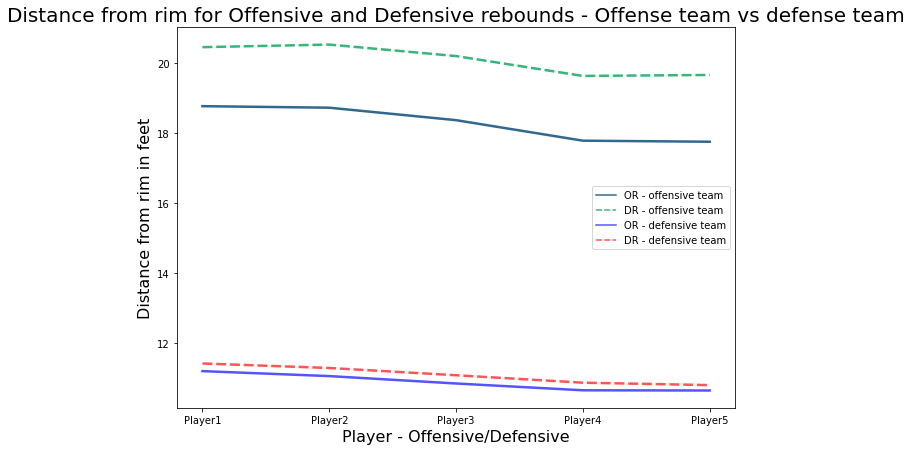

In [335]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_off[['OR - offensive team','DR - offensive team']], palette="viridis", linewidth=2.5)
sns.lineplot(data=df_def[['OR - defensive team','DR - defensive team']], palette="seismic", linewidth=2.5)
plt.xticks(np.arange(0,5),['Player1','Player2','Player3','Player4','Player5'])
plt.title("Distance from rim for Offensive and Defensive rebounds - Offense team vs defense team", fontsize=20)
plt.xlabel("Player - Offensive/Defensive", fontsize=16)
plt.ylabel("Distance from rim in feet", fontsize=16)